<a href="https://colab.research.google.com/github/saichandra42/ML_Assignment3/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

STATE = 10

# EDA 

In [ ]:
data = pd.read_csv('income_dataset.csv')

In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
to_rename = {
    'education.num':'education_num',
    'marital.status': 'marital_status',
    'capital.gain': 'capital_gain',
    'capital.loss': 'capital_loss',
    'hours.per.week': 'hours_per_week',
    'native.country': 'country'
}
data = data.rename(columns=to_rename)

In [ ]:
data.shape

(32561, 15)

In [ ]:
data[data['age'] == '?'].shape[0]

0

# Converting data for learning

In [ ]:
for column in data.columns:
    to_be_filled_n = data[data[column] == '?'].shape[0]
    if to_be_filled_n > 0:
        print(column,to_be_filled_n)

workclass 1836
occupation 1843
country 583


In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
missing_indices = data.query("workclass == '?' or occupation =='?' or country == '?'").index.values

In [ ]:
indices = data.index.to_numpy()

In [ ]:
clean_indices = np.setdiff1d(indices,missing_indices)

In [ ]:
clean_data = data.iloc[clean_indices]

In [ ]:
clean_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


[]

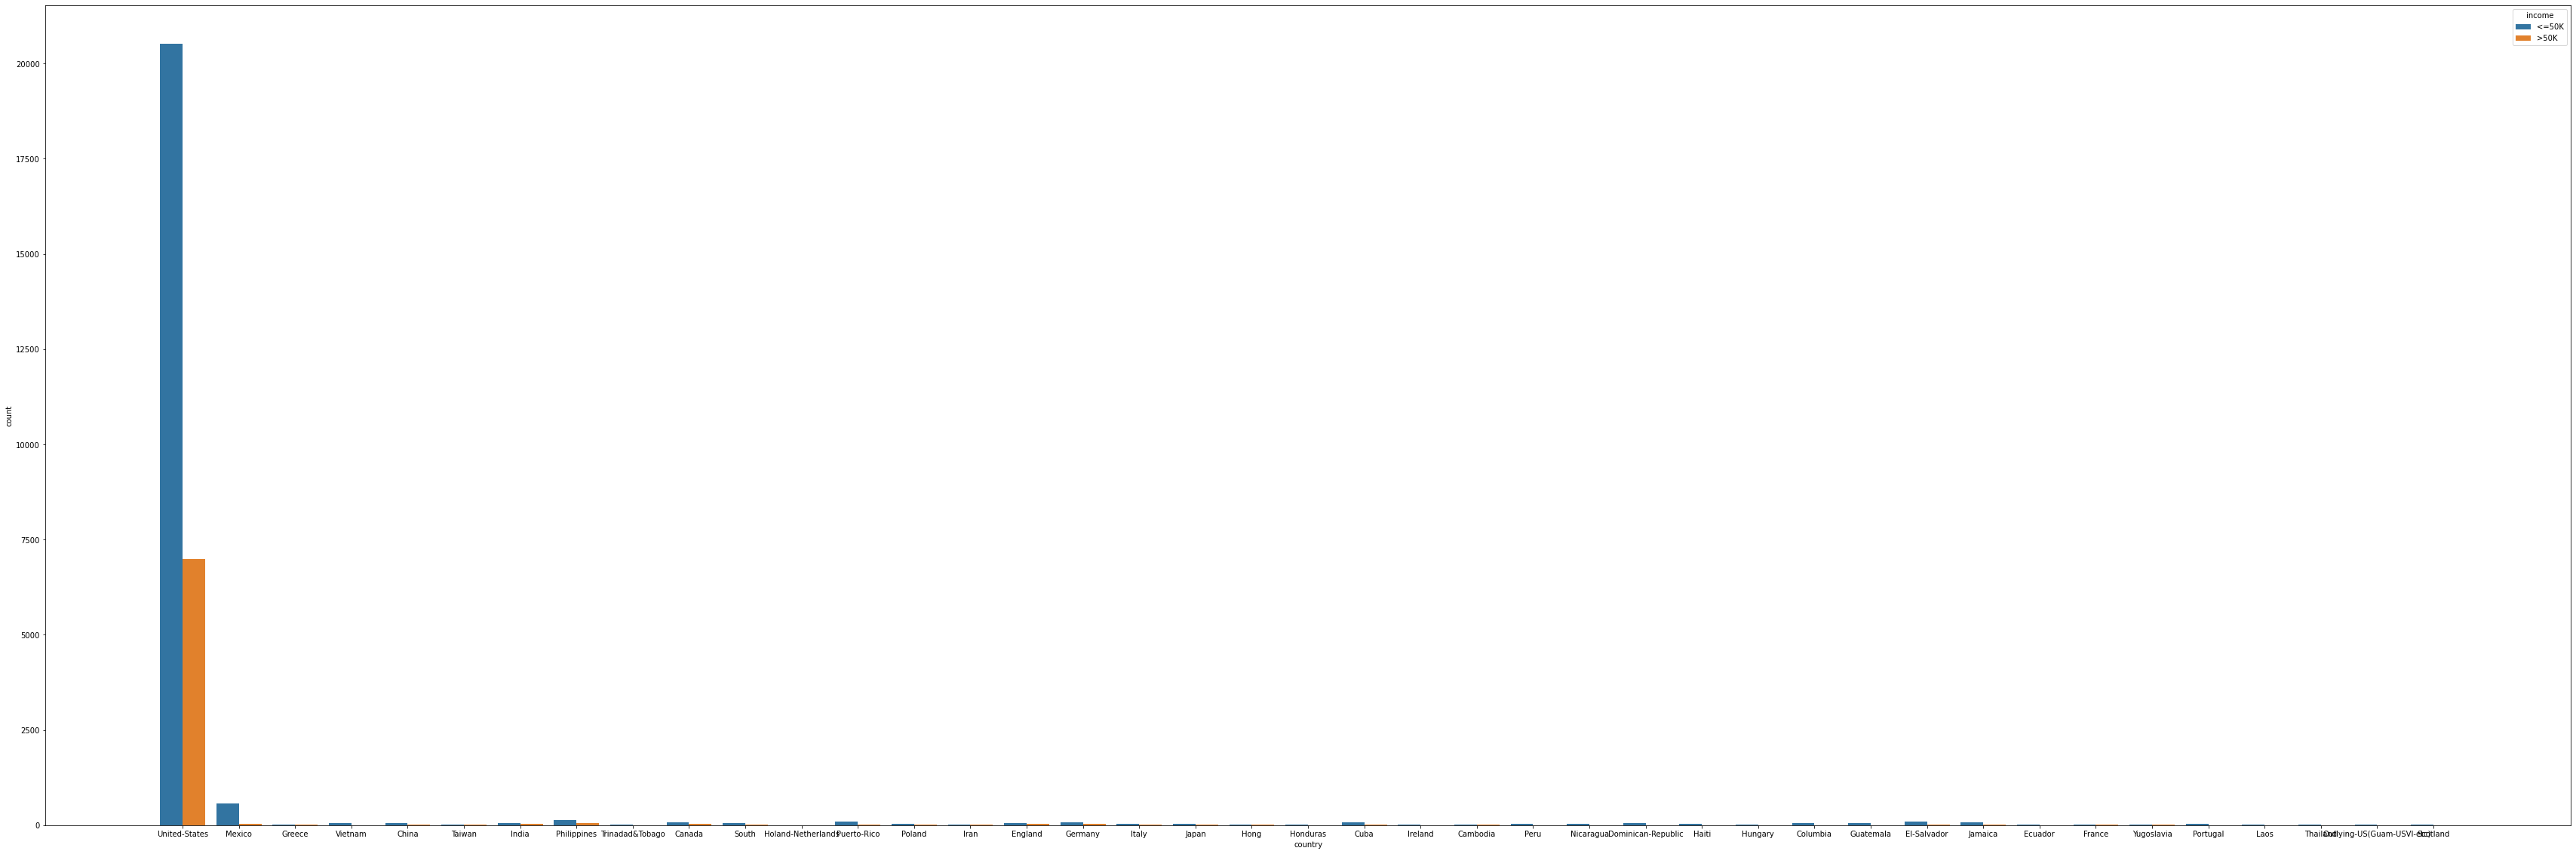

In [ ]:
plt.figure(figsize=(60,20))
sns.countplot(x='country',hue='income',data=clean_data)
plt.plot()

[]

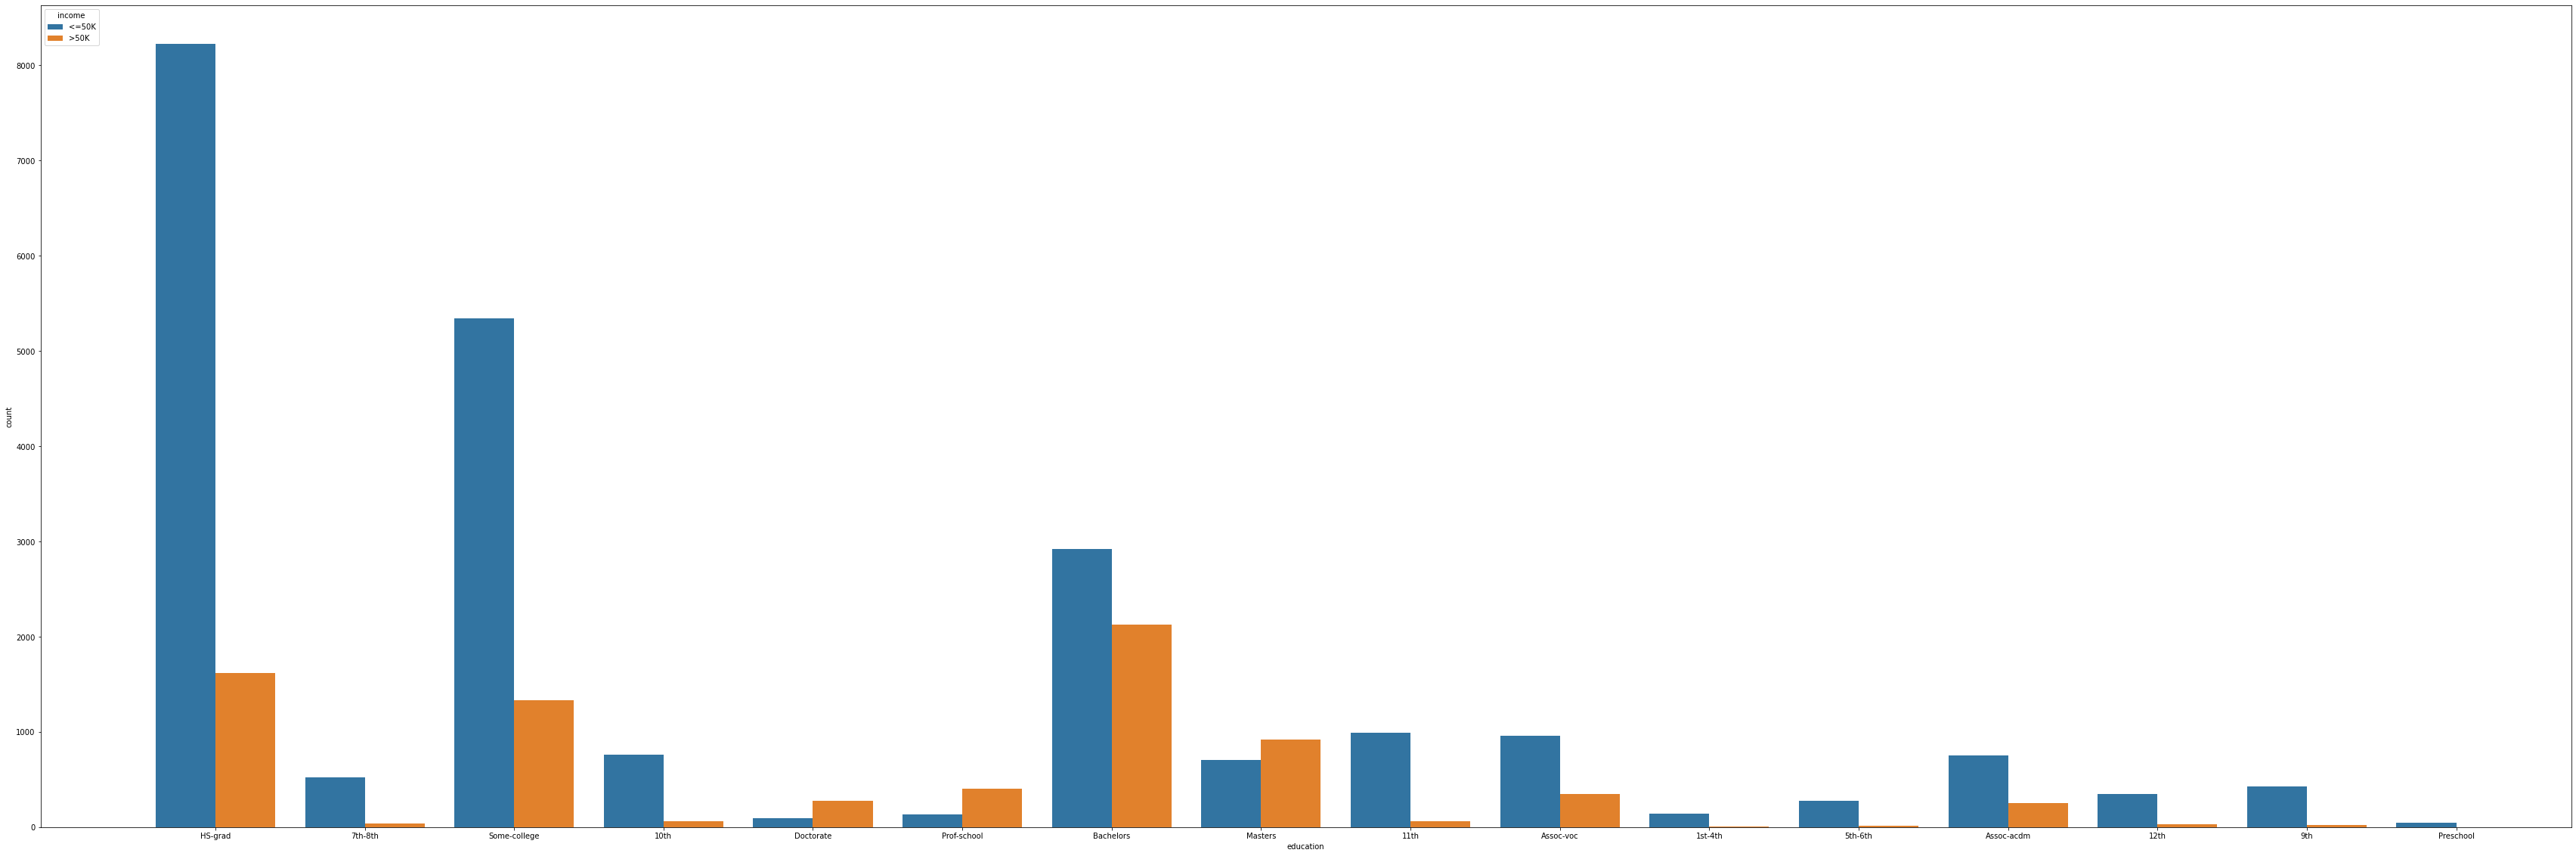

In [ ]:
plt.figure(figsize=(60,20))
sns.countplot(x='education',hue='income',data=clean_data)
plt.plot()

[]

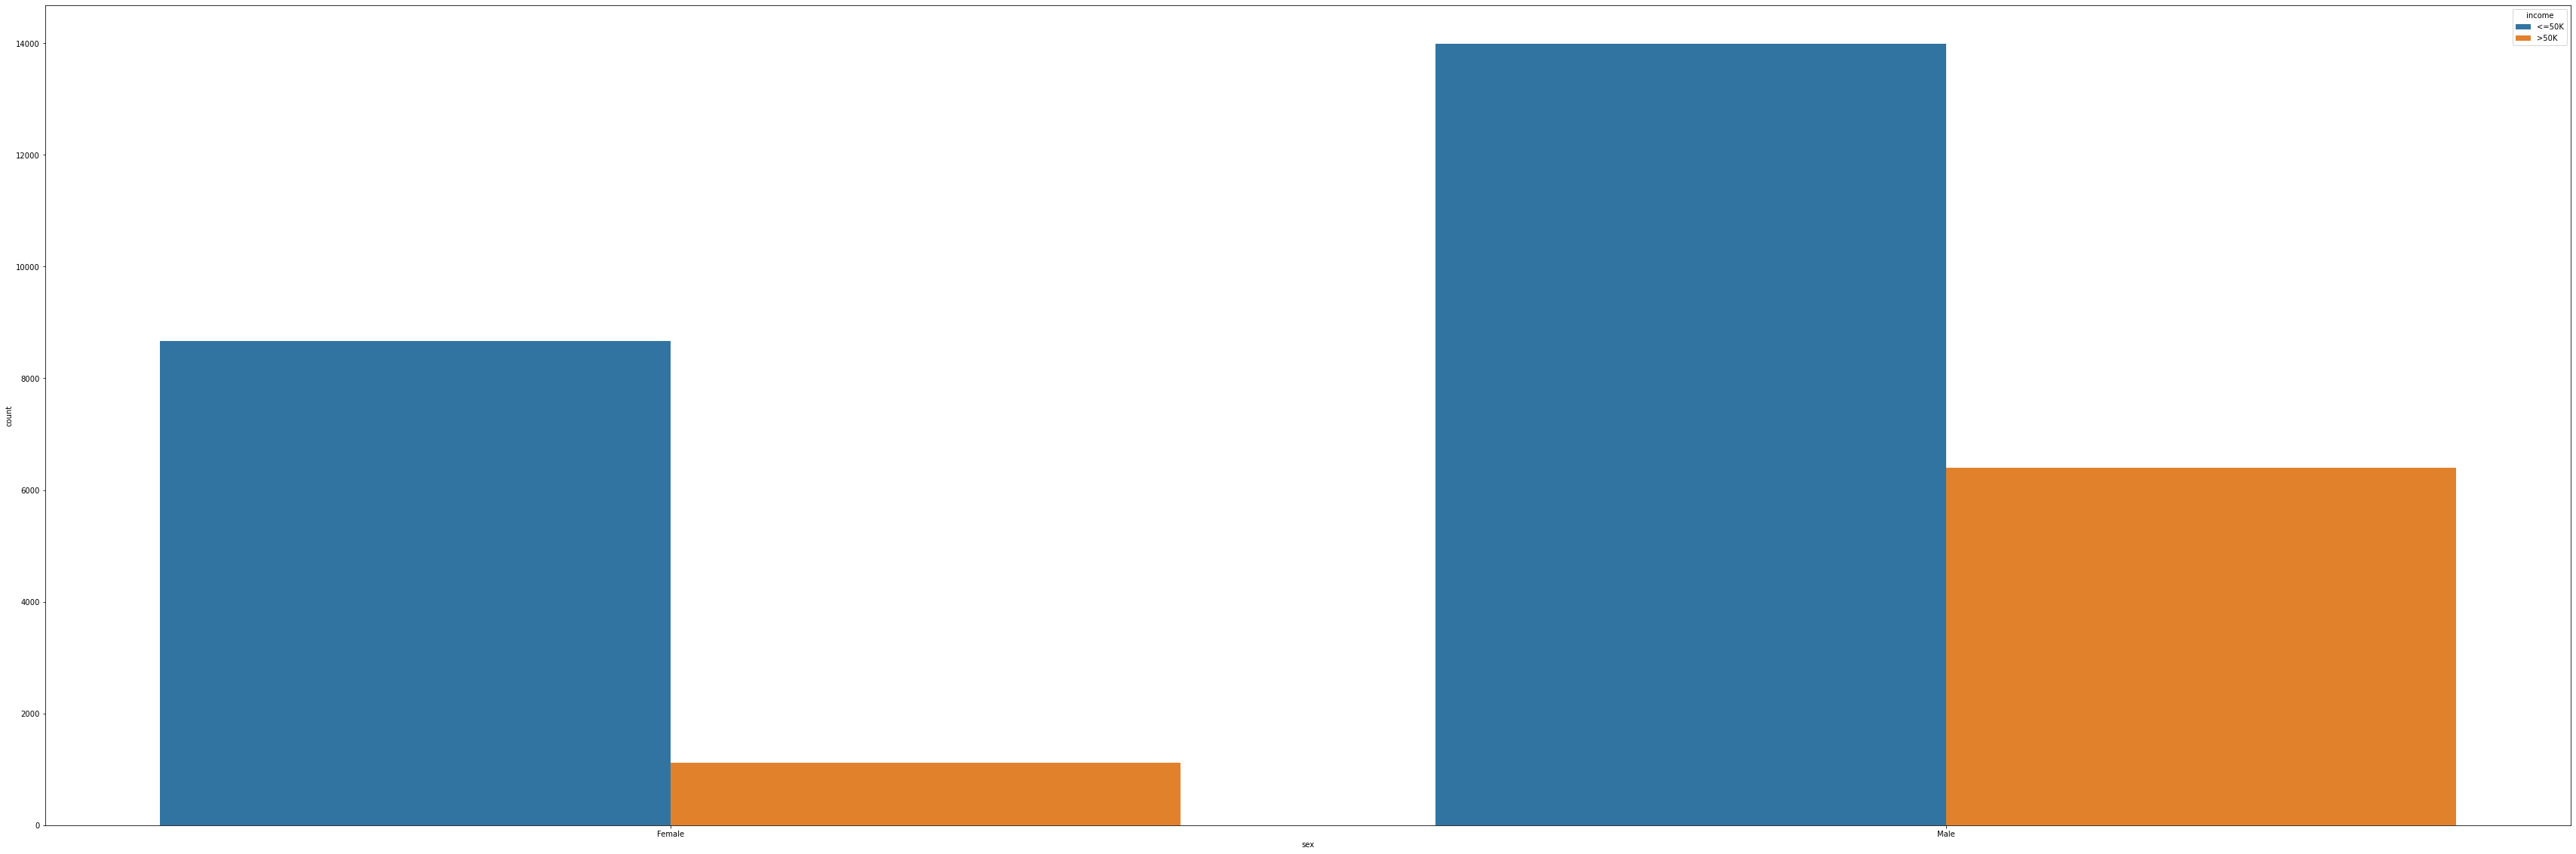

In [ ]:
plt.figure(figsize=(60,20))
sns.countplot(x='sex',hue='income',data=clean_data)
plt.plot()

[]

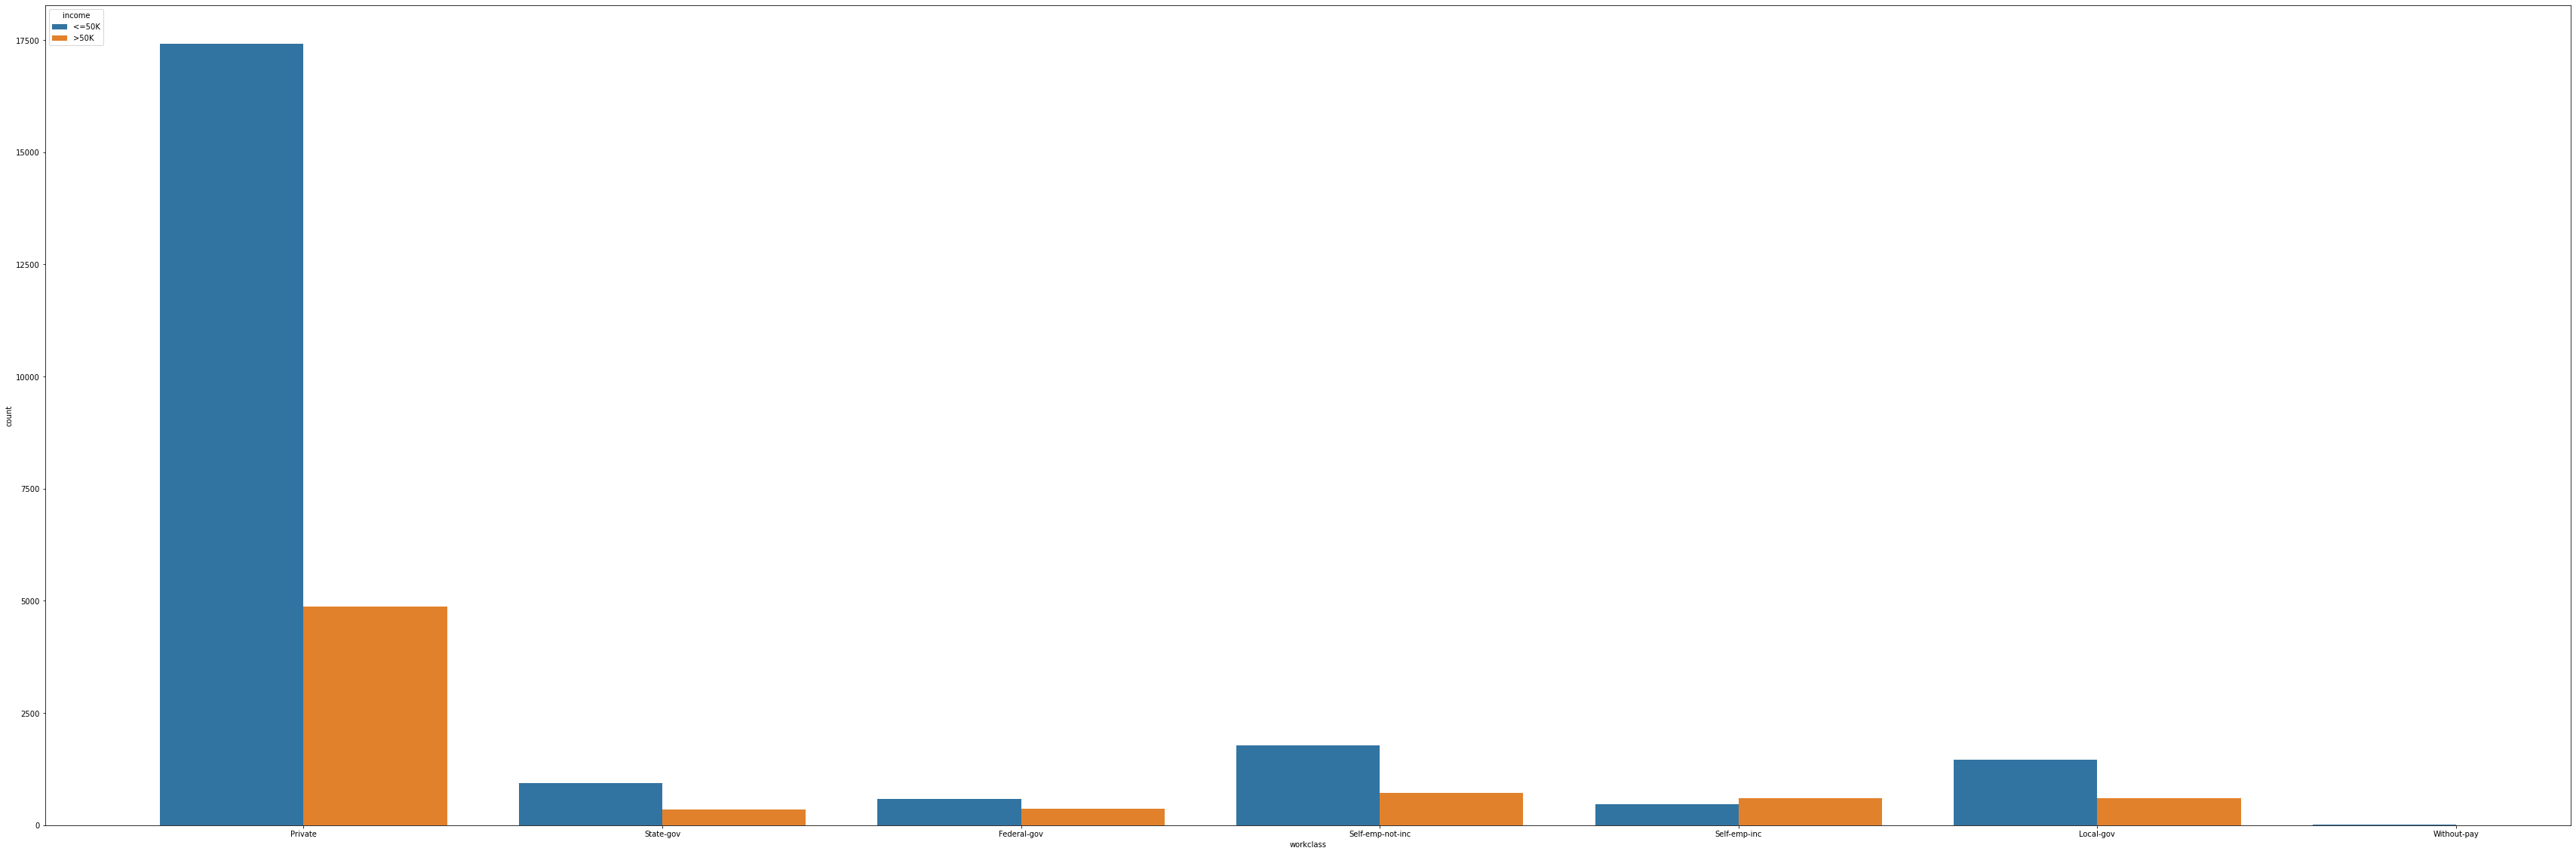

In [ ]:
plt.figure(figsize=(60,20))
sns.countplot(x='workclass',hue='income',data=clean_data)
plt.plot()

[]

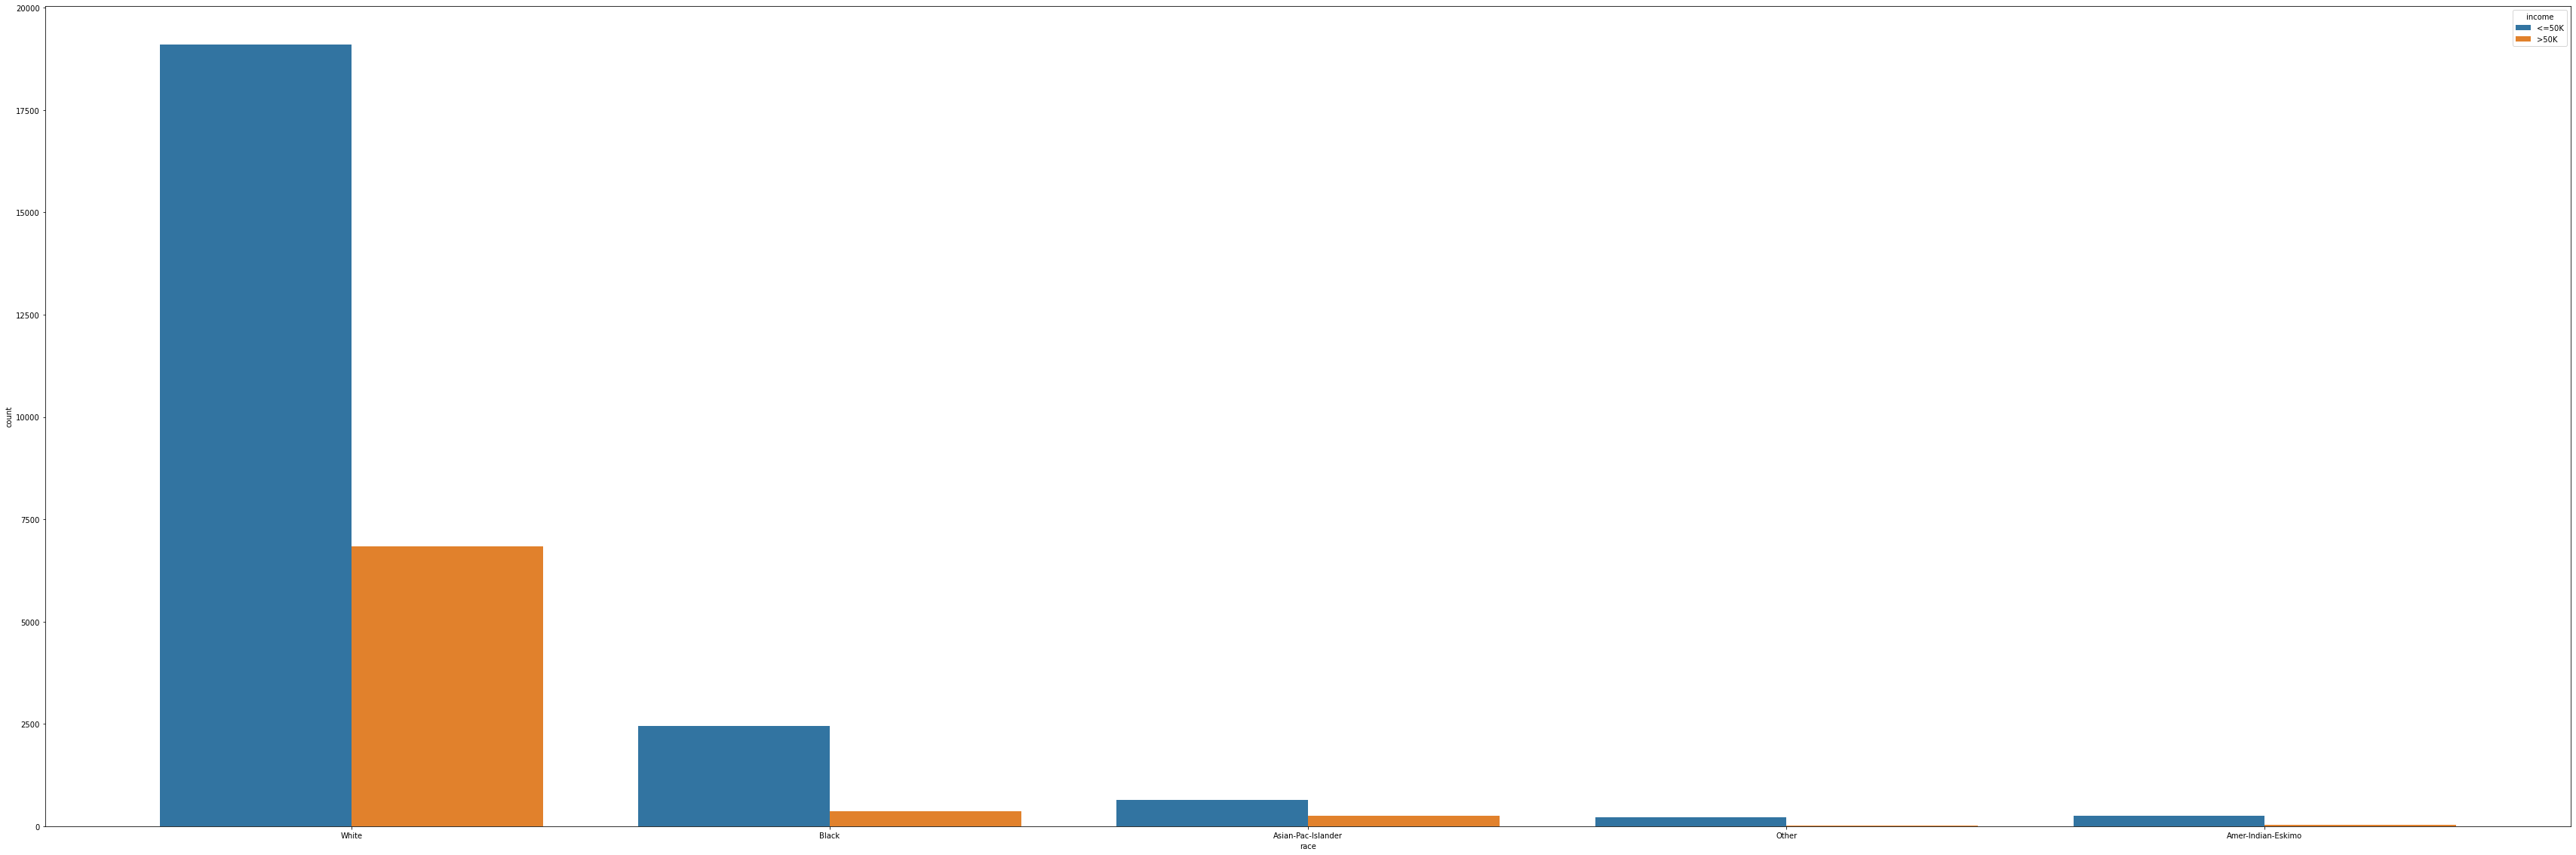

In [ ]:
plt.figure(figsize=(60,20))
sns.countplot(x='race',hue='income',data=clean_data)
plt.plot()

In [ ]:
clean_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [ ]:
clean_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
country           object
income            object
dtype: object

In [ ]:
le = LabelEncoder()

In [ ]:
for col in clean_data.columns:
    if clean_data[col].dtypes == 'object':
        le = LabelEncoder()
        clean_data[col] = le.fit_transform(clean_data[col].astype(str))
    elif clean_data[col].dtypes == 'int64':
        clean_data[col] = (clean_data[col] - clean_data[col].mean())/clean_data[col].std()

In [ ]:
clean_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
1,3.316575,2,-0.538781,11,-0.439731,6,3,1,4,0,-0.147442,10.555639,-1.914129,38,0
3,1.184811,2,-0.467898,5,-2.400519,0,6,4,4,0,-0.147442,9.427759,-0.077733,38,0
4,0.195064,2,0.708633,15,-0.047573,5,9,3,4,0,-0.147442,9.427759,-0.077733,38,0
5,-0.337877,2,0.256218,11,-0.439731,0,7,4,4,0,-0.147442,9.106214,0.339630,38,0
6,-0.033339,2,-0.370958,0,-1.616204,5,0,4,4,1,-0.147442,9.106214,-0.077733,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.251490,2,1.139184,15,-0.047573,4,10,1,4,1,-0.147442,-0.218582,-0.077733,38,0
32557,-0.870818,2,0.638961,7,0.736742,2,12,5,4,0,-0.147442,-0.218582,-0.244678,38,0
32558,0.118929,2,-0.335247,11,-0.439731,2,6,0,4,1,-0.147442,-0.218582,-0.077733,38,1
32559,1.489349,2,-0.358569,11,-0.439731,6,0,4,4,0,-0.147442,-0.218582,-0.077733,38,0


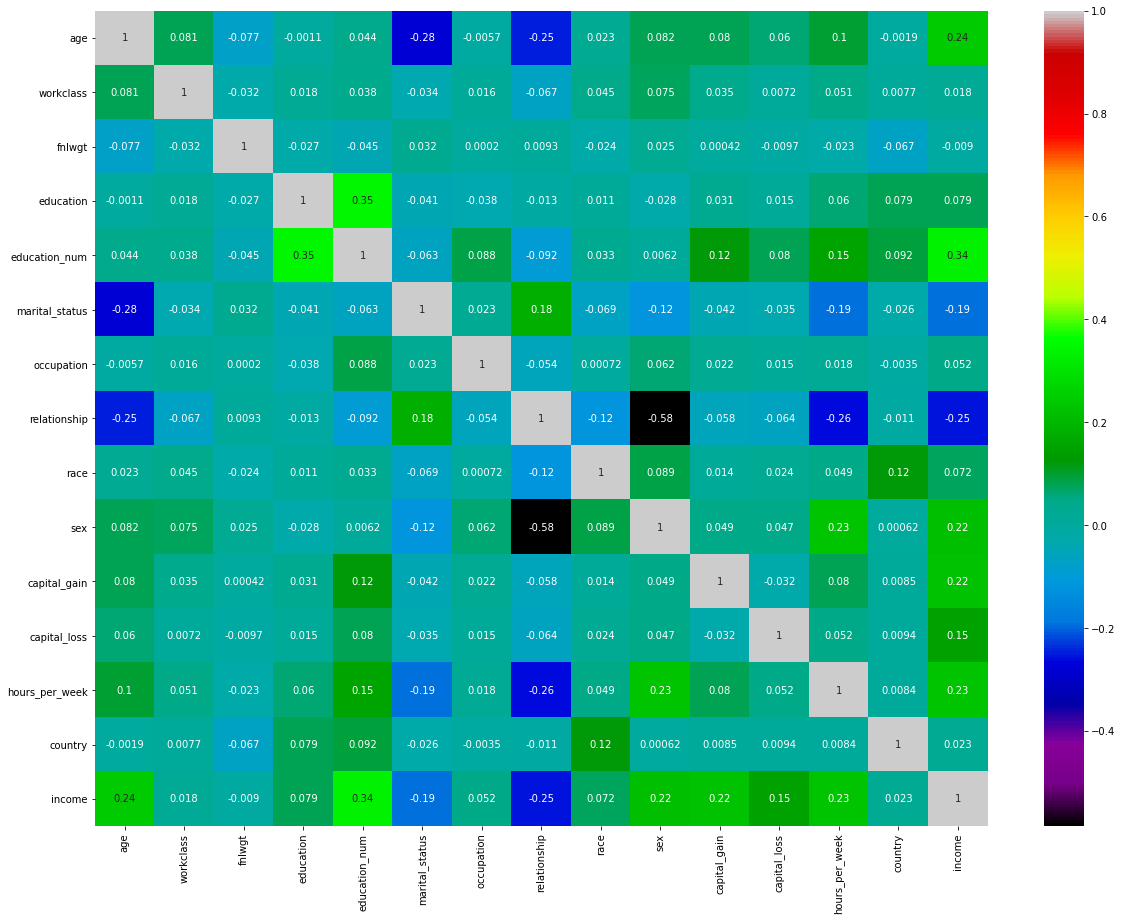

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(clean_data.corr(), annot=True, cmap="nipy_spectral")
plt.show()

In [ ]:
clean_data.dtypes

age               float64
workclass           int64
fnlwgt            float64
education           int64
education_num     float64
marital_status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
country             int64
income              int64
dtype: object

In [ ]:
y = clean_data['income']
X = clean_data.drop(columns=['income'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=STATE)

# Neural Networks

## Installs and imports

In [ ]:
!pip install torch

In [ ]:
!pip install torchmetrics

In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader

import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from collections import OrderedDict

from tqdm import tqdm
import matplotlib.pyplot as plt

## Constants

In [ ]:
BATCH_SIZE = 8
WORKERS = 4

In [ ]:
class IncomeDataSet(Dataset):
    def __init__(self,x,y):
        x = x.to_numpy()
        y = y.to_numpy()
        
        self.x = torch.tensor(x,dtype=torch.float)
        self.y = torch.tensor(y,dtype=torch.long)
        self.n_samples = x.shape[0]
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_samples

In [ ]:
train_dataset = IncomeDataSet(X_train, y_train)
test_dataset = IncomeDataSet(X_test, y_test)

In [ ]:
train_loader = DataLoader(dataset=train_dataset,batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset=test_dataset, batch_size = BATCH_SIZE, shuffle = True)

In [ ]:
train_iterator = iter(train_loader)

In [ ]:
train_iterator.next()

[tensor([[-0.2617,  4.0000, -0.4632, 11.0000, -0.4397,  2.0000,  2.0000,  0.0000,
           4.0000,  1.0000, -0.1474, -0.2186, -0.0777, 38.0000],
         [-1.5560,  3.0000, -1.4338,  1.0000, -1.2240,  4.0000,  4.0000,  3.0000,
           4.0000,  1.0000, -0.1474, -0.2186, -0.9125, 38.0000],
         [-0.2617,  2.0000,  0.9252, 15.0000, -0.0476,  2.0000, 11.0000,  0.0000,
           4.0000,  1.0000, -0.1474, -0.2186,  1.1744, 38.0000],
         [-1.1754,  2.0000,  0.8285, 15.0000, -0.0476,  4.0000,  5.0000,  3.0000,
           4.0000,  1.0000, -0.1474, -0.2186, -0.7455,  4.0000],
         [ 0.1951,  1.0000,  0.1937, 12.0000,  1.5211,  4.0000,  9.0000,  1.0000,
           2.0000,  0.0000, -0.1474, -0.2186, -0.0777, 38.0000],
         [-1.2515,  2.0000, -0.5019, 11.0000, -0.4397,  2.0000,  2.0000,  0.0000,
           4.0000,  1.0000, -0.1474, -0.2186, -0.9125, 38.0000],
         [-0.5663,  2.0000, -0.0639, 12.0000,  1.5211,  2.0000,  3.0000,  0.0000,
           4.0000,  1.0000, -0.1474,

## Network training and testing

In [ ]:
#https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

class Network(nn.Module):
    def __init__(self,n_input_features):
        super().__init__()
        self.n_input_features = n_input_features
        self.network_loss = []
        self.network_accuracy = []
        
        self.model = nn.Sequential(OrderedDict([
          ('Linear1', nn.Linear(n_input_features,2)),
          ('Sigmoid', nn.Sigmoid())
        ]))
        
    def forward(self,x):
        model_output = self.model(x.reshape(-1,self.n_input_features))
        return model_output
    
    def model_output(self, inputs):
        y_predicted = self.model(inputs)
        return y_predicted 
    
    def loss_function(self,predictions,labels):
        loss_fn = F.cross_entropy
        loss = loss_fn(predictions,labels)
        return loss
    
    def accuracy(self,predictions,labels):
        metric = torchmetrics.Accuracy()
        acc = metric(predictions,labels)
        return acc
    
    def train(self,num_epochs = 20,lr = 0.001):
        optimizer = torch.optim.SGD(self.model.parameters(), lr)    
        loop = tqdm(enumerate(range(num_epochs)),total=num_epochs)
        
        # Training loop
        for _,epoch in loop:
            batch_loss = []
            batch_acc = []
            for batch_idx,(inputs,labels) in enumerate(train_loader):
                y_predicted = self.model_output(inputs)
                labels = labels.reshape(-1)
                
                # Loss Metrics
                loss = self.loss_function(y_predicted,labels)
                batch_loss.append(loss.item())
                
                # Accuracy metrics
                acc = self.accuracy(y_predicted,labels)
                batch_acc.append(acc.item())
                
                # Back propogation
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            mean_batch_loss = np.mean(batch_loss)
            mean_batch_acc = np.mean(batch_acc)*100
            
            self.network_loss.append(mean_batch_loss)
            self.network_accuracy.append(mean_batch_acc)
            
            loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
            loop.set_postfix(loss = mean_batch_loss,accuracy = mean_batch_acc)   
            
    def test(self):
        batch_loss = []
        batch_acc = []
        for inputs,labels in test_loader:
            y_predicted = self.model_output(inputs)
            labels = labels.reshape(-1)
            
            # Loss Metrics
            loss = self.loss_function(y_predicted,labels)
            batch_loss.append(loss.item())
                
            # Accuracy metrics
            acc = self.accuracy(y_predicted,labels)
            batch_acc.append(acc.item())
        print(f'Testing Accuracy is {np.mean(batch_acc)*100}%')
     
    def plot(self):
        #plt.plot(self.network_accuracy)
        #plt.show()
        pass

In [ ]:
input_shape = train_dataset[0][0].shape[0]
network = Network(input_shape)

In [ ]:
network.train(50,0.001)

Epoch [50/50]: 100%|█| 50/50 [04:00<00:00,  4.81s/it, accuracy=75.1, loss=0.562]


In [ ]:
network.test()

Testing Accuracy is 75.13245033112584%
